In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
videpath= './fsb.mp4'
capture = cv2.VideoCapture(videpath)

读出来的frame的类型是'numpy.ndarray'   
* frame大小1080, 1920, 3  但是是按bgr存储的需要 改成 rgb   
frame = frame[:,:,[2,1,0]]   


这是将每一帧读取，转换为rgb并存储为gand.npy。   
一共有245帧。每帧大小1080, 1920, 3   
```python
hand = []
while True:
    ret, frame = capture.read()
    if not ret:
        break
    frame = frame[:,:,[2,1,0]]
    hand.append(frame)
hand = np.array(hand)
print(hand.shape)
np.save("hand.npy",hand)
```

#打印一张图片看看   
```python
for i in range(50):
    ret,img_src=capture.read()
img_src = img_src[:,:,[2,1,0]]
plt.figure()
plt.imshow(img_src)
plt.show()
```

#平滑处理  均值滤波  
```python
img_smooth = cv2.blur(img_src,ksize=(3,3))
plt.figure()
plt.imshow(img_smooth)
plt.show()
```


In [35]:
hand = np.load("people.npy")

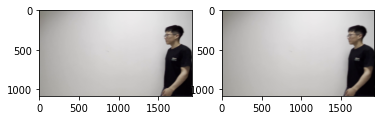

In [43]:
img_smooth = cv2.blur(hand[50],ksize=(10,10))
plt.figure()
plt.subplot(121)
plt.imshow(hand[50])
plt.subplot(122)
plt.imshow(img_smooth)
plt.show()

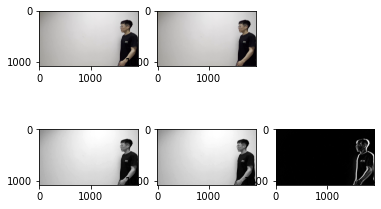

In [44]:
#这一步做帧差
plt.figure()
img_former = hand[50]
plt.subplot(231)
plt.imshow(img_former)
img_after = hand[51]
plt.subplot(232)
plt.imshow(img_former)
#先转为灰度图
img_former_gray = cv2.cvtColor(img_former, cv2.COLOR_BGR2GRAY)
plt.subplot(234)
plt.imshow(img_former_gray,cmap='gray')
img_after_gray = cv2.cvtColor(img_after, cv2.COLOR_BGR2GRAY)
plt.subplot(235)
plt.imshow(img_after_gray,cmap='gray')
new_image = cv2.absdiff(img_former_gray, img_after_gray)
plt.subplot(236)
plt.imshow(new_image,cmap ='gray')
plt.show()


```python
# 计算直方图
hist = cv2.calcHist([new_image],[0],None,[256],[0,255])
# 画出直方图
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("number of Pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()
```

```python
#这是自定义的阈值 从灰度直方图来看，设置阈值为10
ret,thresh1 = cv2.threshold(new_image,10,255,cv2.THRESH_BINARY)
print(ret)
plt.figure()
plt.imshow(thresh1,cmap='gray')
plt.show()
```

59.0


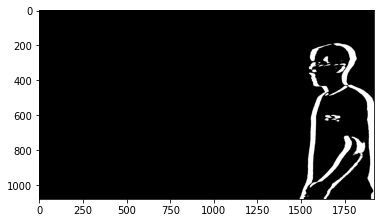

In [45]:
ret,thresh = cv2.threshold(new_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)
plt.figure()
plt.imshow(thresh,cmap='gray')
plt.show()

```python
#这是函数求出来的阈值16（每张图都会不同），效果要好一点。
ret,thresh1 = cv2.threshold(new_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)
plt.figure()
plt.imshow(thresh1,cmap='gray')
plt.show()
```

总感觉膨胀没什么作用啊  


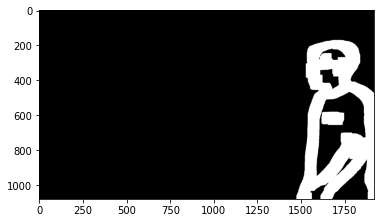

In [46]:
kernel = np.ones((20, 20), np.uint8)
img_dilate = cv2.dilate(thresh, kernel, iterations= 2)
plt.figure()
plt.imshow(img_dilate,cmap='gray')
plt.show()

腐蚀

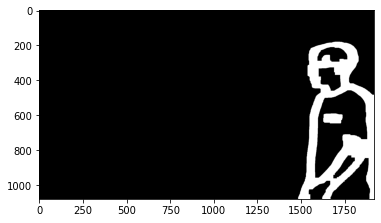

In [47]:
img_erode = cv2.erode(img_dilate, kernel, iterations=1)
plt.figure()
plt.imshow(img_erode,cmap='gray')
plt.show()

找到轮廓

83


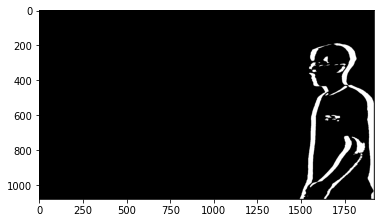

In [48]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
cv2.drawContours(thresh,contours,-1,(0,0,255),thickness=1)
plt.figure()
plt.imshow(thresh,cmap='gray')
plt.show()
# print(contours[0])

9


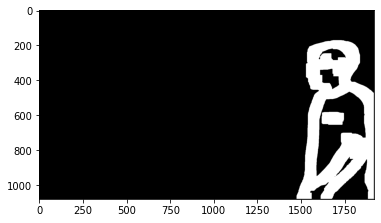

In [49]:
contours, hierarchy = cv2.findContours(img_dilate,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
cv2.drawContours(img_dilate,contours,-1,(0,0,255),thickness=1)
plt.figure()
plt.imshow(img_dilate,cmap='gray')
plt.show()
# print(contours[0])

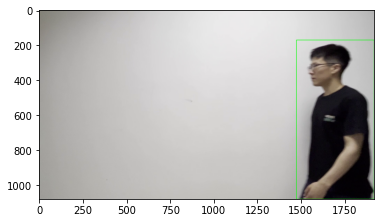

In [50]:
rects = []
for i in range(len(contours)):
    temp = cv2.boundingRect(contours[i])
    rects.append(temp)
for rect in rects:
    [x , y, w, h] = rects[0]
    cv2.rectangle(img_after, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure()
plt.imshow(img_after)
plt.show()